# Fundamentals of Data Analytics
# Exercise Sheet 11: Discriminant Analysis and Clustering

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from typing import Tuple, List

# For prettier plots
plt.style.use('seaborn-v0_8')
%matplotlib inline

## Exercise 1: Fisher's Linear Discriminant Analysis

Implement Fisher's Linear Discriminant Analysis for two classes. Break this down into smaller functions:

1. Calculate class means
2. Calculate within-class scatter matrix
3. Implement the main LDA algorithm
4. Create a prediction function

Fill in the functions below:

In [31]:
def calculate_class_means(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """Calculate mean vectors for each class.
    
    Args:
        X: Input features of shape (n_samples, n_features)
        y: Labels of shape (n_samples,) with values 0 or 1
    
    Returns:
        Tuple of mean vectors for class 0 and class 1
    """
    # Your code here
    class0 = X[y == 0]
    class1 = X[y == 1]

    mean0 = np.mean(class0, axis=0)
    mean1 = np.mean(class1, axis=0)

    return mean0, mean1

def calculate_within_class_scatter(X: np.ndarray, y: np.ndarray, 
                                  mean0: np.ndarray, mean1: np.ndarray) -> np.ndarray:
    """Calculate the within-class scatter matrix.
    
    Args:
        X: Input features
        y: Labels
        mean0: Mean vector of class 0
        mean1: Mean vector of class 1
    
    Returns:
        Within-class scatter matrix
    """
    # Your code here
    class0 = X[y == 0]
    class1 = X[y == 1]

    scatter0 = np.dot((class0 - mean0).T, (class0 - mean0))
    scatter1 = np.dot((class1 - mean1).T, (class1 - mean1))

    within_class_scatter = scatter0 + scatter1
    return within_class_scatter

class FisherLDA:
    def fit(self, X: np.ndarray, y: np.ndarray):
        """Fit the Fisher LDA model.
        
        Args:
            X: Training features
            y: Training labels (0 or 1)
        """
        # Calculate means
        self.mean0, self.mean1 = calculate_class_means(X, y)
        
        # Calculate within-class scatter matrix
        W = calculate_within_class_scatter(X, y, self.mean0, self.mean1)
        
        # Calculate direction vector d
        self.d = self.mean1 - self.mean0
        
        # Calculate discriminant vector a
        self.a = np.linalg.inv(W).dot(self.d)
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels for samples in X.
        
        Args:
            X: Input features
            
        Returns:
            Predicted class labels (0 or 1)
        """
        # Calculate midpoint between classes
        midpoint = np.dot(self.a, (self.mean0 + self.mean1) / 2)
        print(midpoint)
        
        # Calculate projections
        projections = np.dot(X, self.a)
        
        # Classify based on projection
        return (projections > midpoint).astype(int)

## Visualization

1. Generate synthetic datasets with different properties
2. Visualize decision boundaries
3. Compute performance metrics


Testing with noise level: 0.5
0.006764479658750797
0.006764479658750797

Results for Fisher LDA:
Training accuracy: 1.0000
Test accuracy: 1.0000

Confusion Matrix:
[[29  0]
 [ 0 31]]
0.006764479658750797


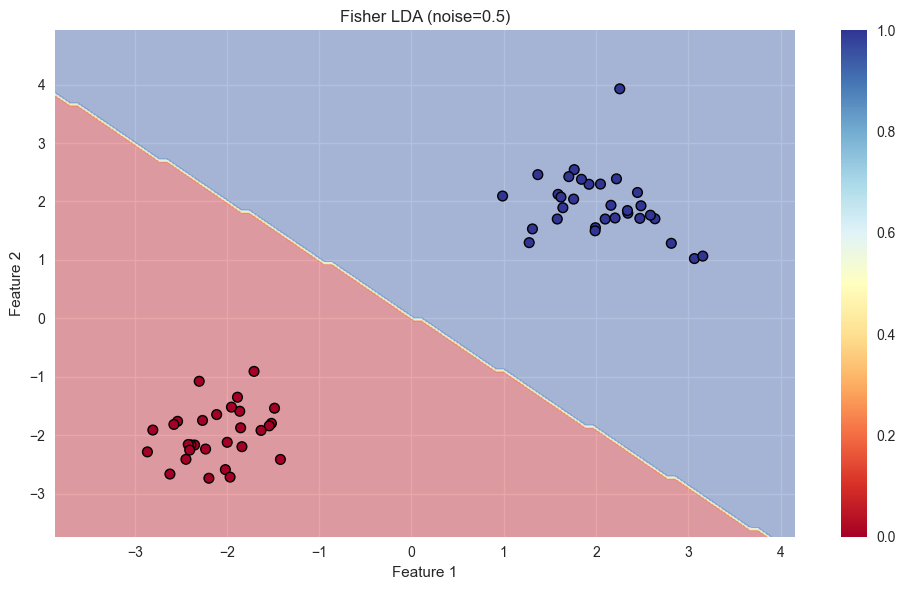


Testing with noise level: 1.0
0.0034341413238344
0.0034341413238344

Results for Fisher LDA:
Training accuracy: 0.9929
Test accuracy: 1.0000

Confusion Matrix:
[[29  0]
 [ 0 31]]
0.0034341413238344


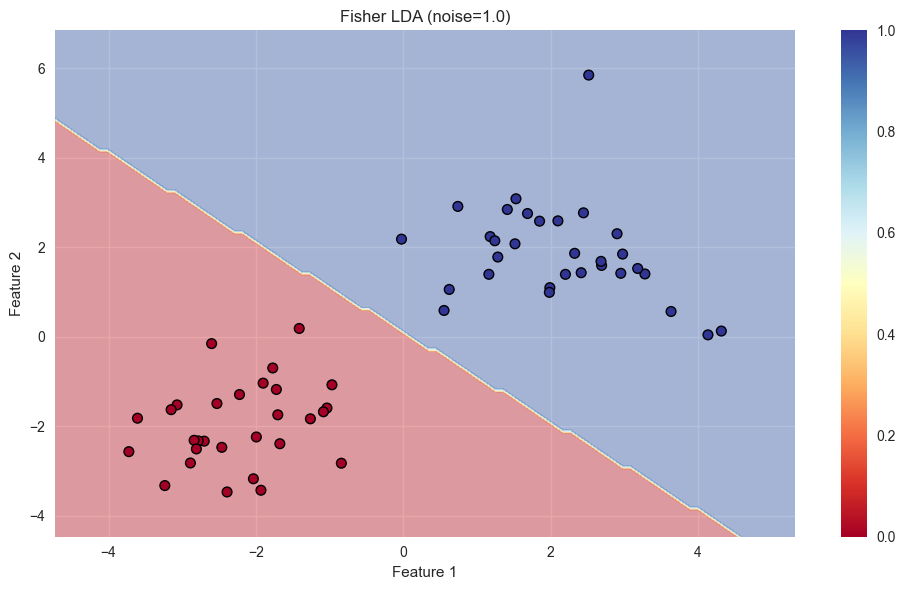


Testing with noise level: 2.0
0.0017689721563761932
0.0017689721563761932

Results for Fisher LDA:
Training accuracy: 0.9214
Test accuracy: 0.9500

Confusion Matrix:
[[28  1]
 [ 2 29]]
0.0017689721563761932


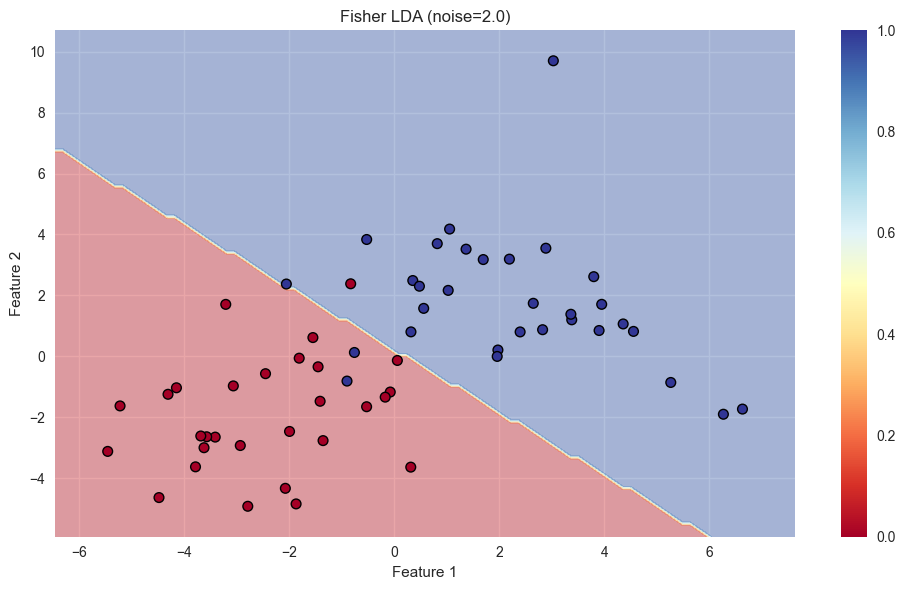

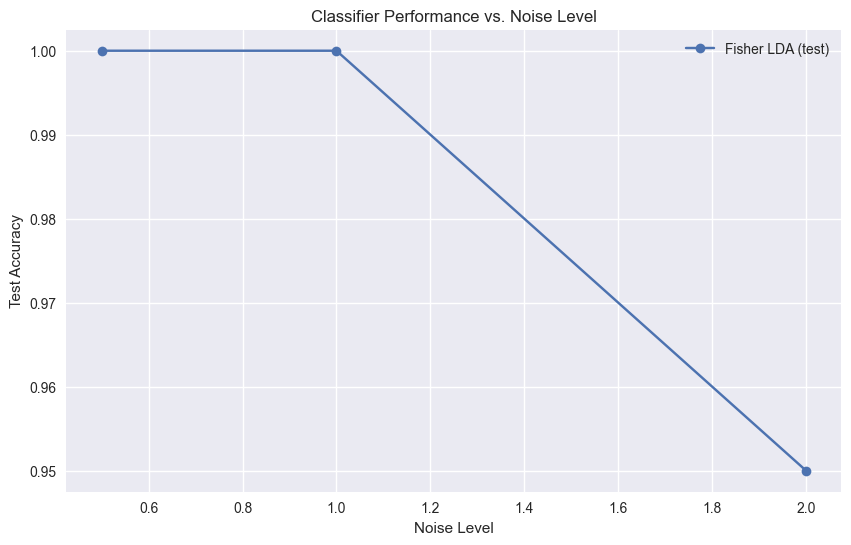

In [32]:
def generate_dataset(n_samples: int = 100, noise: float = 1.0, random_state: int = 42) -> Tuple[np.ndarray, np.ndarray]:
    """Generate synthetic datasets with different properties for testing discriminant analysis.
    
    Args:
        n_samples: Number of samples per class
        noise: Standard deviation of the Gaussian noise
        random_state: Random seed for reproducibility
        
    Returns:
        Tuple of (X, y) where X has shape (2*n_samples, 2) and y has shape (2*n_samples,)
    """
    # Generate two Gaussian clusters
    centers = [(-2, -2), (2, 2)]
    X, y = make_blobs(n_samples=n_samples, centers=centers, 
                    cluster_std=noise, random_state=random_state)

    return X, y

def plot_decision_boundary(model, X: np.ndarray, y: np.ndarray, title: str):
    """Plot the decision boundary and data points for a classifier.
    
    Args:
        model: Fitted classifier with predict method
        X: Training features
        y: Training labels
        title: Plot title
    """
    # Create mesh grid
    margin = 1
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Make predictions on mesh grid
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and points
    # plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                         edgecolors='black', linewidth=1)
    plt.colorbar(scatter)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.grid(True)

def evaluate_classifier(model, X_train: np.ndarray, X_test: np.ndarray, 
                       y_train: np.ndarray, y_test: np.ndarray, name: str):
    """Evaluate a classifier's performance and print metrics.
    
    Args:
        model: Classifier to evaluate
        X_train: Training features
        X_test: Test features
        y_train: Training labels
        y_test: Test labels
        name: Name of the classifier for printing
    """
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Print results
    print(f"\nResults for {name}:")
    print(f"Training accuracy: {train_acc:.4f}")
    print(f"Test accuracy: {test_acc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    
    return train_acc, test_acc, cm

def plot_classifier(flda, noise_levels: List[float] = [0.5, 1.0, 2.0]) -> List[dict]:
    """Compare Fisher LDA and Gaussian DA across different noise levels.
    
    Args:
        noise_levels: List of noise standard deviations to test
    """
    results = []
    
    for noise in noise_levels:
        print(f"\nTesting with noise level: {noise}")
        
        # Generate dataset
        X, y = generate_dataset(n_samples=200, noise=noise)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
        
        # Train and evaluate Fisher LDA
        flda.fit(X_train, y_train)
        flda_train_acc, flda_test_acc, _ = evaluate_classifier(
            flda, X_train, X_test, y_train, y_test, "Fisher LDA"
        )
        
        # Plot decision boundaries
        plt.figure(figsize=(10, 6))

        plot_decision_boundary(flda, X_test, y_test, 
                             f'Fisher LDA (noise={noise})')
        
        plt.tight_layout()
        plt.show()
        
        # Store results
        results.append({
            'noise': noise,
            'flda_train': flda_train_acc,
            'flda_test': flda_test_acc,
        })
    
    return results

def plot_results(results):
    """Plot results across noise levels.
    
    Args:
        results: List of dictionaries containing results
    """
    noise_levels = [r['noise'] for r in results]
    
    plt.figure(figsize=(10, 6))
    
    # Plot test accuracies
    plt.plot(noise_levels, [r['flda_test'] for r in results], 
             'o-', label='Fisher LDA (test)')
    
    plt.xlabel('Noise Level')
    plt.ylabel('Test Accuracy')
    plt.title('Classifier Performance vs. Noise Level')
    plt.legend()
    plt.grid(True)
    plt.show()


flda = FisherLDA()
results = plot_classifier(flda)
plot_results(results)


## Exercise 2: K-means Implementation

Implement the k-means clustering algorithm with the following components:
1. Initialize centroids
2. Assign points to clusters (Expectation step)
3. Update centroids (Maximization step)
4. Implement the main algorithm loop

In [4]:
def initialize_centroids(X: np.ndarray, k: int, random_state: int = 42) -> np.ndarray:
    """Initialize k centroids randomly from the data points.
    
    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters
        random_state: Random seed for reproducibility
    
    Returns:
        Centroids of shape (k, n_features)
    """
    # Your code here
    np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], k, replace=False) # replace=False ensures no duplicates , this function gives me the indices of the choice of the data points from the
    centroids = X[indices]
    return centroids

def assign_clusters(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """Assign each point to the nearest centroid.
    
    Args:
        X: Input data
        centroids: Current centroids
    
    Returns:
        Cluster assignments for each point
    """
    # Your code here
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X: np.ndarray, cluster_assignments: np.ndarray, k: int) -> np.ndarray:
    """Update centroids based on current cluster assignments.
    
    Args:
        X: Input data
        cluster_assignments: Current cluster assignments
        k: Number of clusters
    
    Returns:
        Updated centroids
    """
    # Your code here
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[cluster_assignments == i]
        if len(points_in_cluster) > 0:
            centroids[i] = np.mean(points_in_cluster, axis=0)
    return centroids

def kmeans(X: np.ndarray, k: int, max_iters: int = 100, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray]:
    """Implement k-means clustering algorithm.
    
    Args:
        X: Input data
        k: Number of clusters
        max_iters: Maximum number of iterations
        tol: Convergence tolerance
    
    Returns:
        Tuple of (cluster_assignments, centroids)
    """
    # Your code here
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        cluster_assignments = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return cluster_assignments, centroids

In [ ]:
def initialize_centroids(X: np.ndarray, k: int, random_state: int = 42) -> np.ndarray:
    """Initialize k centroids randomly from the data points.
    
    Args:
        X: Input data of shape (n_samples, n_features)
        k: Number of clusters
        random_state: Random seed for reproducibility
    
    Returns:
        Centroids of shape (k, n_features)
    """
    # Your code here
    np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], k, replace=False) # replace=False ensures no duplicates , this function gives me the indices of the choice of the data points from the data
    centroids = X[indices]
    return centroids # random centroids

def assign_clusters(X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    """Assign each point to the nearest centroid.
    
    Args:
        X: Input data
        centroids: Current centroids
    
    Returns:
        Cluster assignments for each point
    """
    # Your code here
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X: np.ndarray, cluster_assignments: np.ndarray, k: int) -> np.ndarray:
    """Update centroids based on current cluster assignments.
    
    Args:
        X: Input data
        cluster_assignments: Current cluster assignments
        k: Number of clusters
    
    Returns:
        Updated centroids
    """
    # Your code here
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[cluster_assignments == i]
        if len(points_in_cluster) > 0:
            centroids[i] = np.mean(points_in_cluster, axis=0)
    return centroids

def kmeans(X: np.ndarray, k: int, max_iters: int = 100, tol: float = 1e-4) -> Tuple[np.ndarray, np.ndarray]:
    """Implement k-means clustering algorithm.
    
    Args:
        X: Input data
        k: Number of clusters
        max_iters: Maximum number of iterations
        tol: Convergence tolerance
    
    Returns:
        Tuple of (cluster_assignments, centroids)
    """
    # Your code here
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        cluster_assignments = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return cluster_assignments, centroids

## Visualization Functions

Functions to visualize the clustering process:

In [5]:
def plot_clusters(X: np.ndarray, cluster_assignments: np.ndarray, centroids: np.ndarray, 
                  iteration: int, ax: plt.Axes = None):
    """Plot clusters and centroids.
    
    Args:
        X: Input data
        cluster_assignments: Cluster assignments for each point
        centroids: Current centroids
        iteration: Current iteration number
        ax: Matplotlib axes object
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    
    # Plot points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
    
    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidth=3)
    
    ax.set_title(f'Iteration {iteration}')
    return scatter

def visualize_kmeans_steps(X: np.ndarray, k: int, max_iters: int = 10):
    """Visualize k-means clustering steps.
    
    Args:
        X: Input data
        k: Number of clusters
        max_iters: Maximum number of iterations to show
    """
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    # Create figure
    n_rows = (max_iters + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4*n_rows))
    axes = axes.ravel()
    
    # Initial plot
    cluster_assignments = assign_clusters(X, centroids)
    plot_clusters(X, cluster_assignments, centroids, 0, axes[0])
    
    # Iterate and plot
    for i in range(max_iters):
        # Update clusters
        cluster_assignments = assign_clusters(X, centroids)
        centroids = update_centroids(X, cluster_assignments, k)
        
        # Plot current state
        if i + 1 < len(axes):
            plot_clusters(X, cluster_assignments, centroids, i+1, axes[i+1])
    
    plt.tight_layout()
    plt.show()

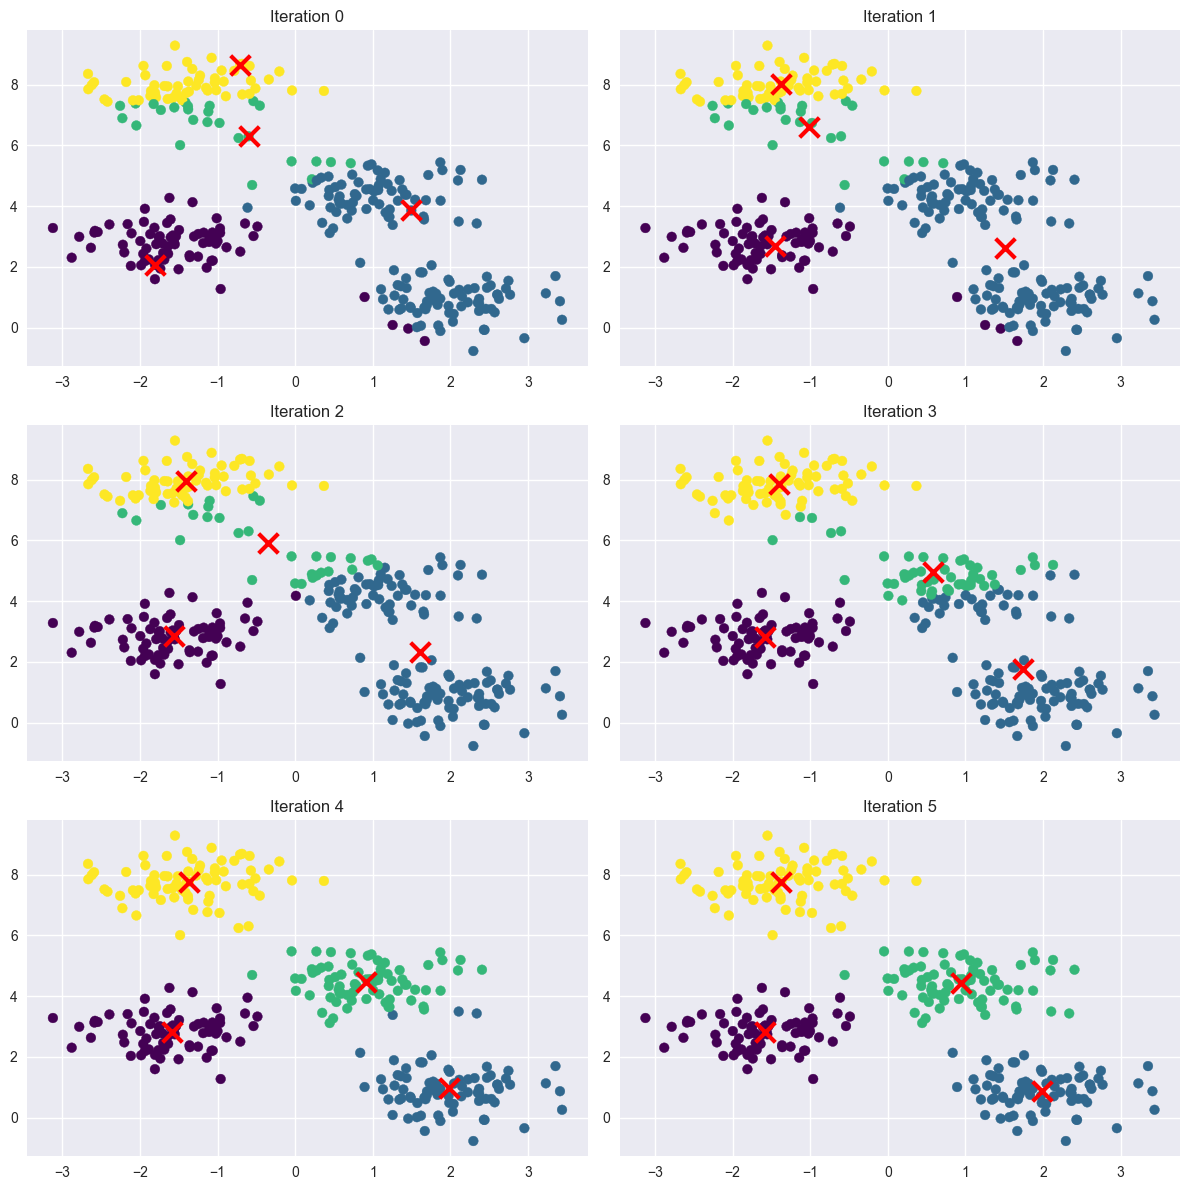

<Figure size 1000x800 with 0 Axes>

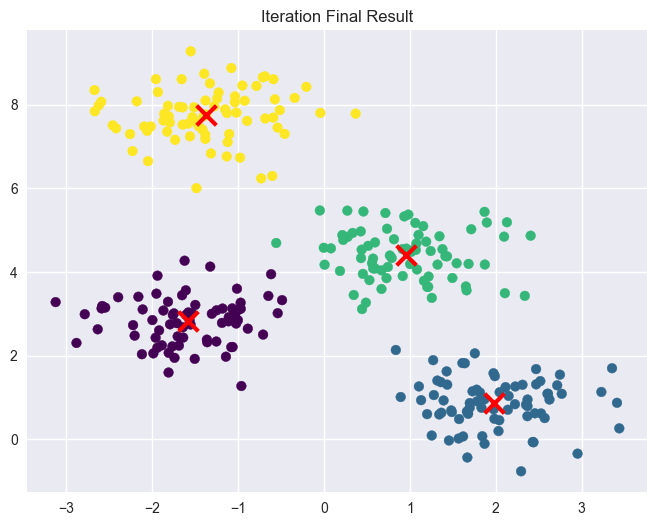

In [6]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize clustering steps
visualize_kmeans_steps(X, k=4, max_iters=6)

# Calculate and print final clusters
final_assignments, final_centroids = kmeans(X, k=4)

# Plot final result
plt.figure(figsize=(10, 8))
plot_clusters(X, final_assignments, final_centroids, 'Final Result')
plt.show()

In [10]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.